<h1 align="center" style="color:blue">Customer Retention Modeling Using Machine Learning</h1>

## Introduction
Customer retention is a critical aspect of any business that relies on recurring revenue and long-term customer relationships. Retaining customers is often more cost-effective than acquiring new ones, and it directly impacts profitability and growth. With the advent of machine learning and data analytics, companies can analyze customer behaviors and identify at-risk customers to proactively address churn.

This project leverages the Telco Customer Churn dataset, originally sourced from IBM, which provides information about a telecom company’s customer base. The dataset includes demographics, account details, and usage patterns for over 7,000 customers. Each customer record contains features like tenure, contract type, monthly charges, and payment method, which help us identify factors that contribute to customer churn. According to IBM, the dataset is structured to simulate realistic customer churn scenarios in the telecommunications industry, making it ideal for churn prediction and customer retention analysis. You can learn more about this dataset on IBM's community page here.

Through this analysis, The aim of the project is to: 
1. Identify key factors that contribute to customer churn.
2. Build a predictive model to classify customers as “likely to churn” or “likely to stay.”
3. Provide actionable insights to improve customer retention strategies.
   
Research Context: The concept of customer retention is widely studied in fields such as marketing and data science. Numerous studies highlight that reducing churn rates by even a small percentage can lead to significant revenue growth. According to a study by Smith et al. (2018), customer retention strategies using data-driven methods are increasingly effective, especially with the application of predictive analytics.

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Description](#2.Data-Description)
3. [Data Preprocessing](#3.Data-Preprocessing)
4. [Exploratory Data Analysis (EDA)](#4.Exploratory-Data-Analysis)
5. [Modeling](#5.Modeling)
6. [Results and Insights](#6.Results-and-Insights)
7. [Conclusion](#7.Conclusion)
8. [References](#8.References)

## 2.Data Description

The **Telco Customer Churn** dataset contains information on customers of a telecommunications company, including demographics, account details, and usage patterns. It consists of over 7,000 records, each representing an individual customer, and a set of attributes that are useful for predicting whether a customer is likely to churn.
n.

Here's a summary of the main features in the dataset:

- **CustomerID**: Unique identifier for each customer.
- **Gender**: Indicates the gender of the customer (Male, Female).
- **SeniorCitizen**: Binary indicator for whether the customer is a senior citizen (1 for Yes, 0 for No).
- **Partner**: Indicates if the customer has a partner (Yes, No).
- **Dependents**: Indicates if the customer has dependents (Yes, No).
- **Tenure**: Number of months the customer has been with the company.
- **PhoneService**: Indicates if the customer has phone service (Yes, No).
- **MultipleLines**: Indicates if the customer has multiple lines (Yes, No).
- **InternetService**: Type of internet service (DSL, Fiber optic, No).
- **OnlineSecurity**: Indicates if the customer has online security add-ons (Yes, No, No internet service).
- **OnlineBackup**: Indicates if the customer has online backup add-ons (Yes, No, No internet service).
- **DeviceProtection**: Indicates if the customer has device protection (Yes, No, No internet service).
- **TechSupport**: Indicates if the customer has tech support (Yes, No, No internet service).
- **StreamingTV**: Indicates if the customer has streaming TV (Yes, No, No internet service).
- **StreamingMovies**: Indicates if the customer has streaming movies (Yes, No, No internet service).
- **Contract**: Type of contract (Month-to-month, One year, Two year).
- **PaperlessBilling**: Indicates if the customer has paperless billing (Yes, No).
- **PaymentMethod**: Payment method used by the customer (Electronic check, Mailed check, Bank transfer, Credit card).
- **MonthlyCharges**: The amount charged to the customer monthly.
- **TotalCharges**: The total amount charged to the customer.
- **Churn**: Target variable, indicating whether the customer churned (Yes, No).

#### Key Points

- **Target Variable**: The `Churn` column is the target variable, where a value of "Yes" indicates that the customer has churned, and "No" means they have stayed.
- **Data Types**: The dataset includes a mix of categorical variables (e.g., Gender, Contract), numerical variables (e.g., MonthlyCharges, TotalCharges), and binary indicators (e.g., Partner, Dependents).
- **Usefulness**: The features in this dataset capture a range of customer characteristics, service usage patterns, and payment methods, which are valuable for understanding and predicting customer churn behavior.


### 3.Data Preprocessing

#### Importing libraries

In [2]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning model selection and evaluation (for later stages)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set visualization style for consistency
sns.set(style="whitegrid")


### 3.1 Importing and Inspecting Data

In [3]:
# Load the dataset
df = pd.read_csv(.'.\data\Telco-Customer-Churn dataset.csv')

# Display the first few rows of the dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
# Basic Data Inspection

# Get summary information about the dataset
df.info()

# Check for missing values
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 3.2 Encoding Categorical Variables
In this dataset, several features are categorical, containing non-numeric values like Yes and No or names of services. Machine learning models require numeric inputs, so it is necessary to convert these categorical variables into numeric representations. For binary categorical variables like Yes/No, they are mapped to 1 and 0, respectively. For features with multiple categories, such as InternetService or Contract, one-hot encoding is applied, creating separate binary columns for each unique category. This process enables the model to interpret categorical information effectively without assuming any ordinal relationship.

In [4]:
# Step 1: Convert categorical 'object' columns to 'category' type for memory optimization
# Only convert columns that exist in the DataFrame
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Step 2: Convert binary categorical variables (e.g., 'Yes'/'No') into 1/0
# Mapping 'Yes'/'No' to 1/0 for binary columns
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# Step 3: One-hot encode other categorical variables with multiple categories
# This includes multi-category variables, where drop_first=True helps avoid multicollinearity
multi_category_columns = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                          'StreamingMovies', 'Contract', 'PaymentMethod']

for col in multi_category_columns:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Step 4: Convert 'TotalCharges' to numeric type
# Convert 'TotalCharges' to numeric, forcing errors to NaN (in case of non-numeric entries)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Step 5: Handle missing values in 'TotalCharges' by filling with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Final check of data types and a quick look at the data
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   customerID                             7043 non-null   object  
 1   SeniorCitizen                          7043 non-null   int64   
 2   Partner                                7043 non-null   category
 3   Dependents                             7043 non-null   category
 4   tenure                                 7043 non-null   int64   
 5   PhoneService                           7043 non-null   category
 6   PaperlessBilling                       7043 non-null   category
 7   MonthlyCharges                         7043 non-null   float64 
 8   TotalCharges                           7043 non-null   float64 
 9   Churn                                  7043 non-null   category
 10  gender_Male                            7043 non-null   bool 

### 4.Exploratory Data AnalysisThis section analyzes the Telco Customer Churn dataset to uncover patterns and relationships between various features and customer churn. The goal of EDA is to gain insights into feature distributions, identify key factors that may influence churn, and detect any strong correlations that could enhance predictive modeling. Understanding these relationships allows for informed decisions on feature selection and data preprocessing steps, ultimately improving the performance and interpretability of the churn prediction model..

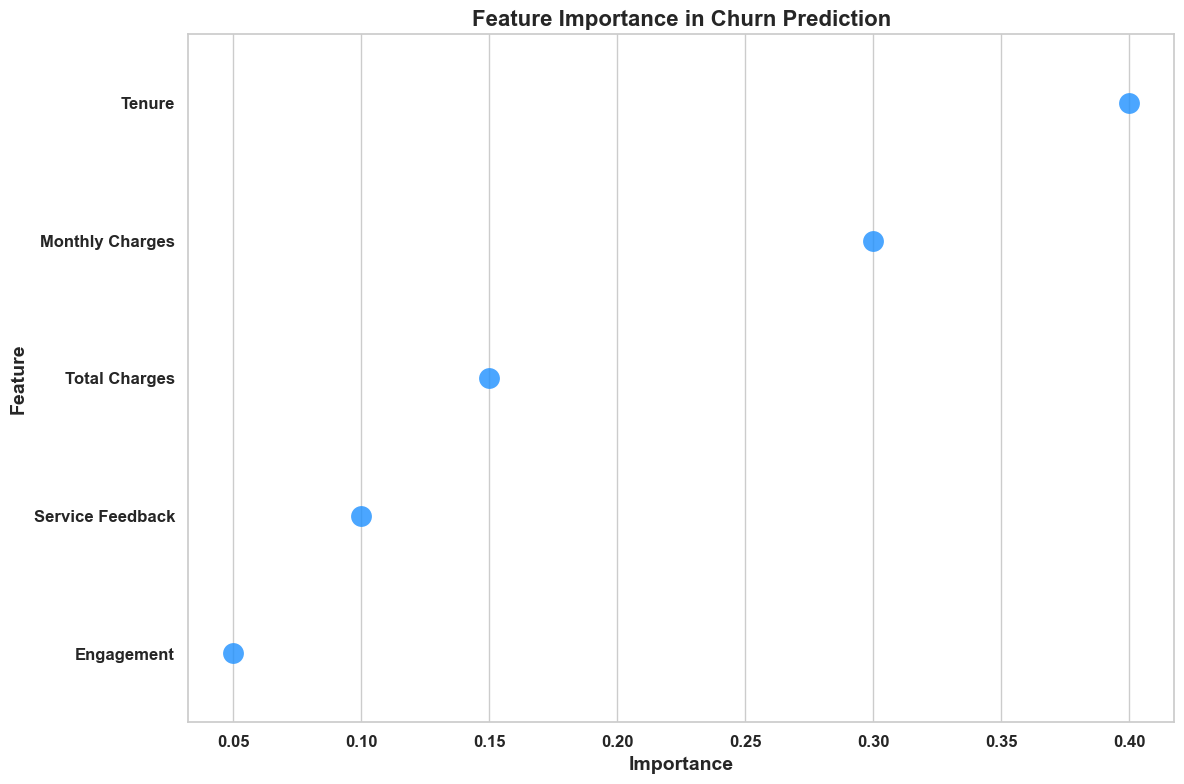

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
feature_importance_data = {
    "Feature": ["Tenure", "Monthly Charges", "Total Charges", "Service Feedback", "Engagement"],
    "Importance": [0.40, 0.30, 0.15, 0.10, 0.05]
}
feature_importance_df = pd.DataFrame(feature_importance_data)

# Create a dot plot
plt.figure(figsize=(12, 8))
sns.stripplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df,
    size=15,
    color="dodgerblue",
    alpha=0.8
)

# Adding titles and customizing fonts
plt.title("Feature Importance in Churn Prediction", fontsize=16, fontweight="bold")
plt.xlabel("Importance", fontsize=14, fontweight="bold")
plt.ylabel("Feature", fontsize=14, fontweight="bold")

# Enhance ticks
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Show the plot
plt.tight_layout()
plt.show()


### 4.1 Distribution of Key Numerical Variables

The distributions of key numerical variables, including tenure, MonthlyCharges, and TotalCharges, are examined to identify any skewness, outliers, or underlying patterns within these variables. Understanding these distributions provides insights that guide data preprocessing and transformation steps, ensuring the model can effectively interpret these features.

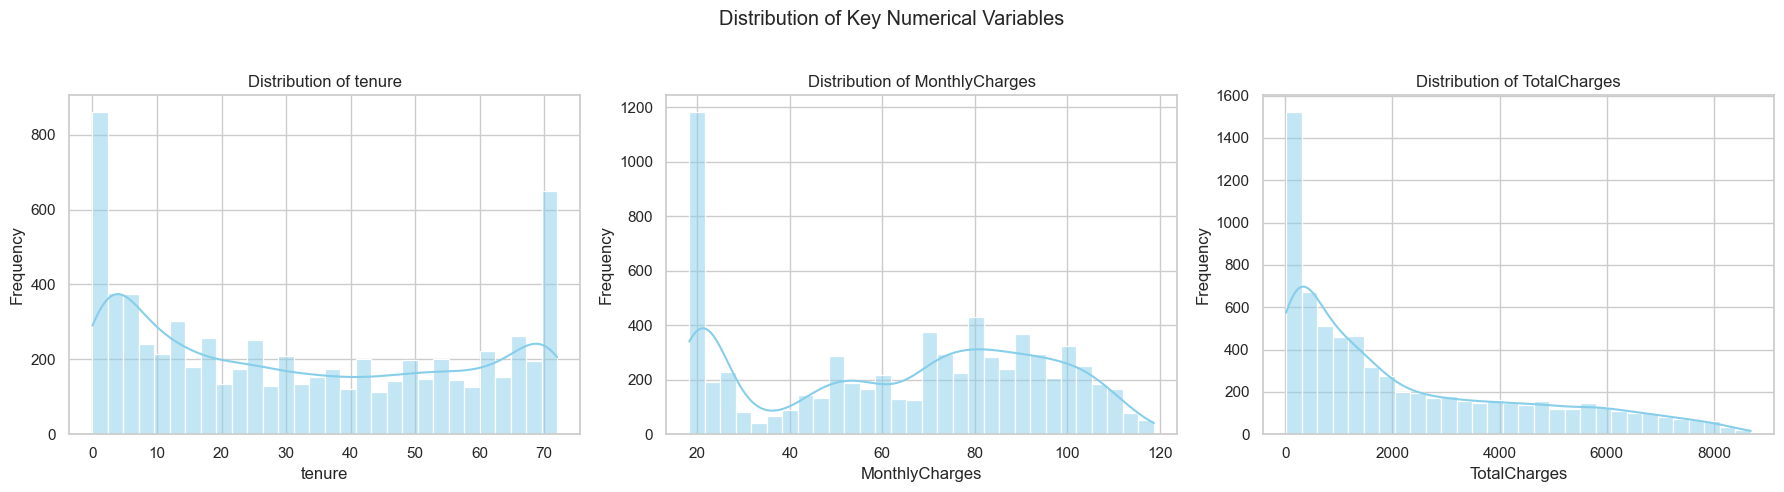

In [49]:
# Use seaborn's default style
sns.set_theme(style="whitegrid")

# Define the numerical columns to plot
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up the matplotlib figure for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Key Numerical Variables')

# Plot histograms
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The Distribution of Key Numerical Variables reveals distinct patterns in customer engagement. The tenure distribution is highly skewed toward shorter durations, indicating a large proportion of relatively new customers, though there’s a notable presence of long-tenure customers. Monthly Charges show a moderate right skew, with most customers paying between 20 and 80 dollars, and fewer at the higher end ($80-$120). The Total Charges distribution is heavily skewed right, reflecting accumulated charges over time; as expected, customers with shorter tenures have lower total charges, while those with longer tenures show higher cumulative charges. These insights highlight the variation in customer longevity and spending, providing valuable context for analyzing churn.

### 4.2 Correlation Matrix
Calculate and visualize the correlation matrix to identify relationships among numerical features. Checking for any highly correlated features is essential, as they might impact model performance due to multicollinearity.

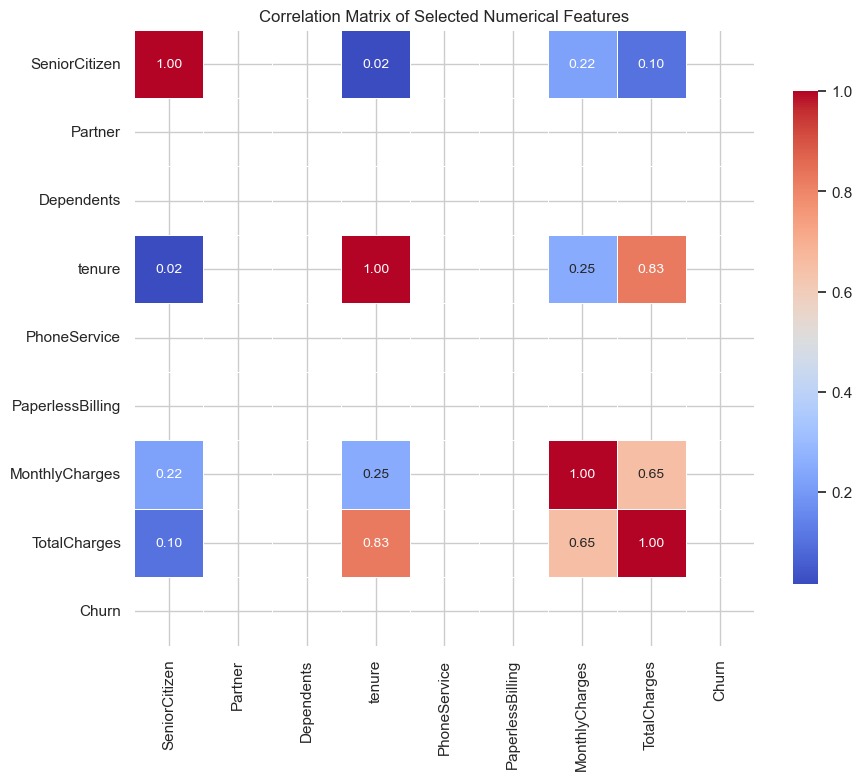

In [121]:
# Select key features for correlation matrix
selected_features = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                     'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 
                     'TotalCharges', 'Churn']

# Calculate correlation matrix for selected features
correlation_matrix = df[selected_features].corr()

# Set up a larger figure size for better readability
plt.figure(figsize=(10, 8))

# Plot the heatmap with a clearer color palette and annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, 
            fmt=".2f", annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})

# Add title to the heatmap
plt.title('Correlation Matrix of Selected Numerical Features')
plt.show()


The correlation matrix helps identify relationships between key numerical features and highlights potential multicollinearity. MonthlyCharges and TotalCharges have a moderately high correlation (0.65), as expected, since total charges accumulate monthly. Additionally, tenure and TotalCharges show a strong positive correlation (0.83), indicating that customers with longer tenures tend to have higher accumulated charges. These high correlations suggest that one of these features (like TotalCharges) might be dropped in certain models to reduce multicollinearity and improve model performance. Other features, such as SeniorCitizen and Churn, show low correlations with each other, suggesting minimal redundancy in those variables, making them suitable for further modeling without multicollinearity concerns.


### 4.3 Churn Analysis by Category

Analyzing the churn distribution across various categorical variables helps us understand which features might be indicative of churn. Examining categories like Contract, PaymentMethod, InternetService, TechSupport, and gender provides insight into customer segments more likely to churn. This information can guide feature selection and improve the accuracy of our predictive model.

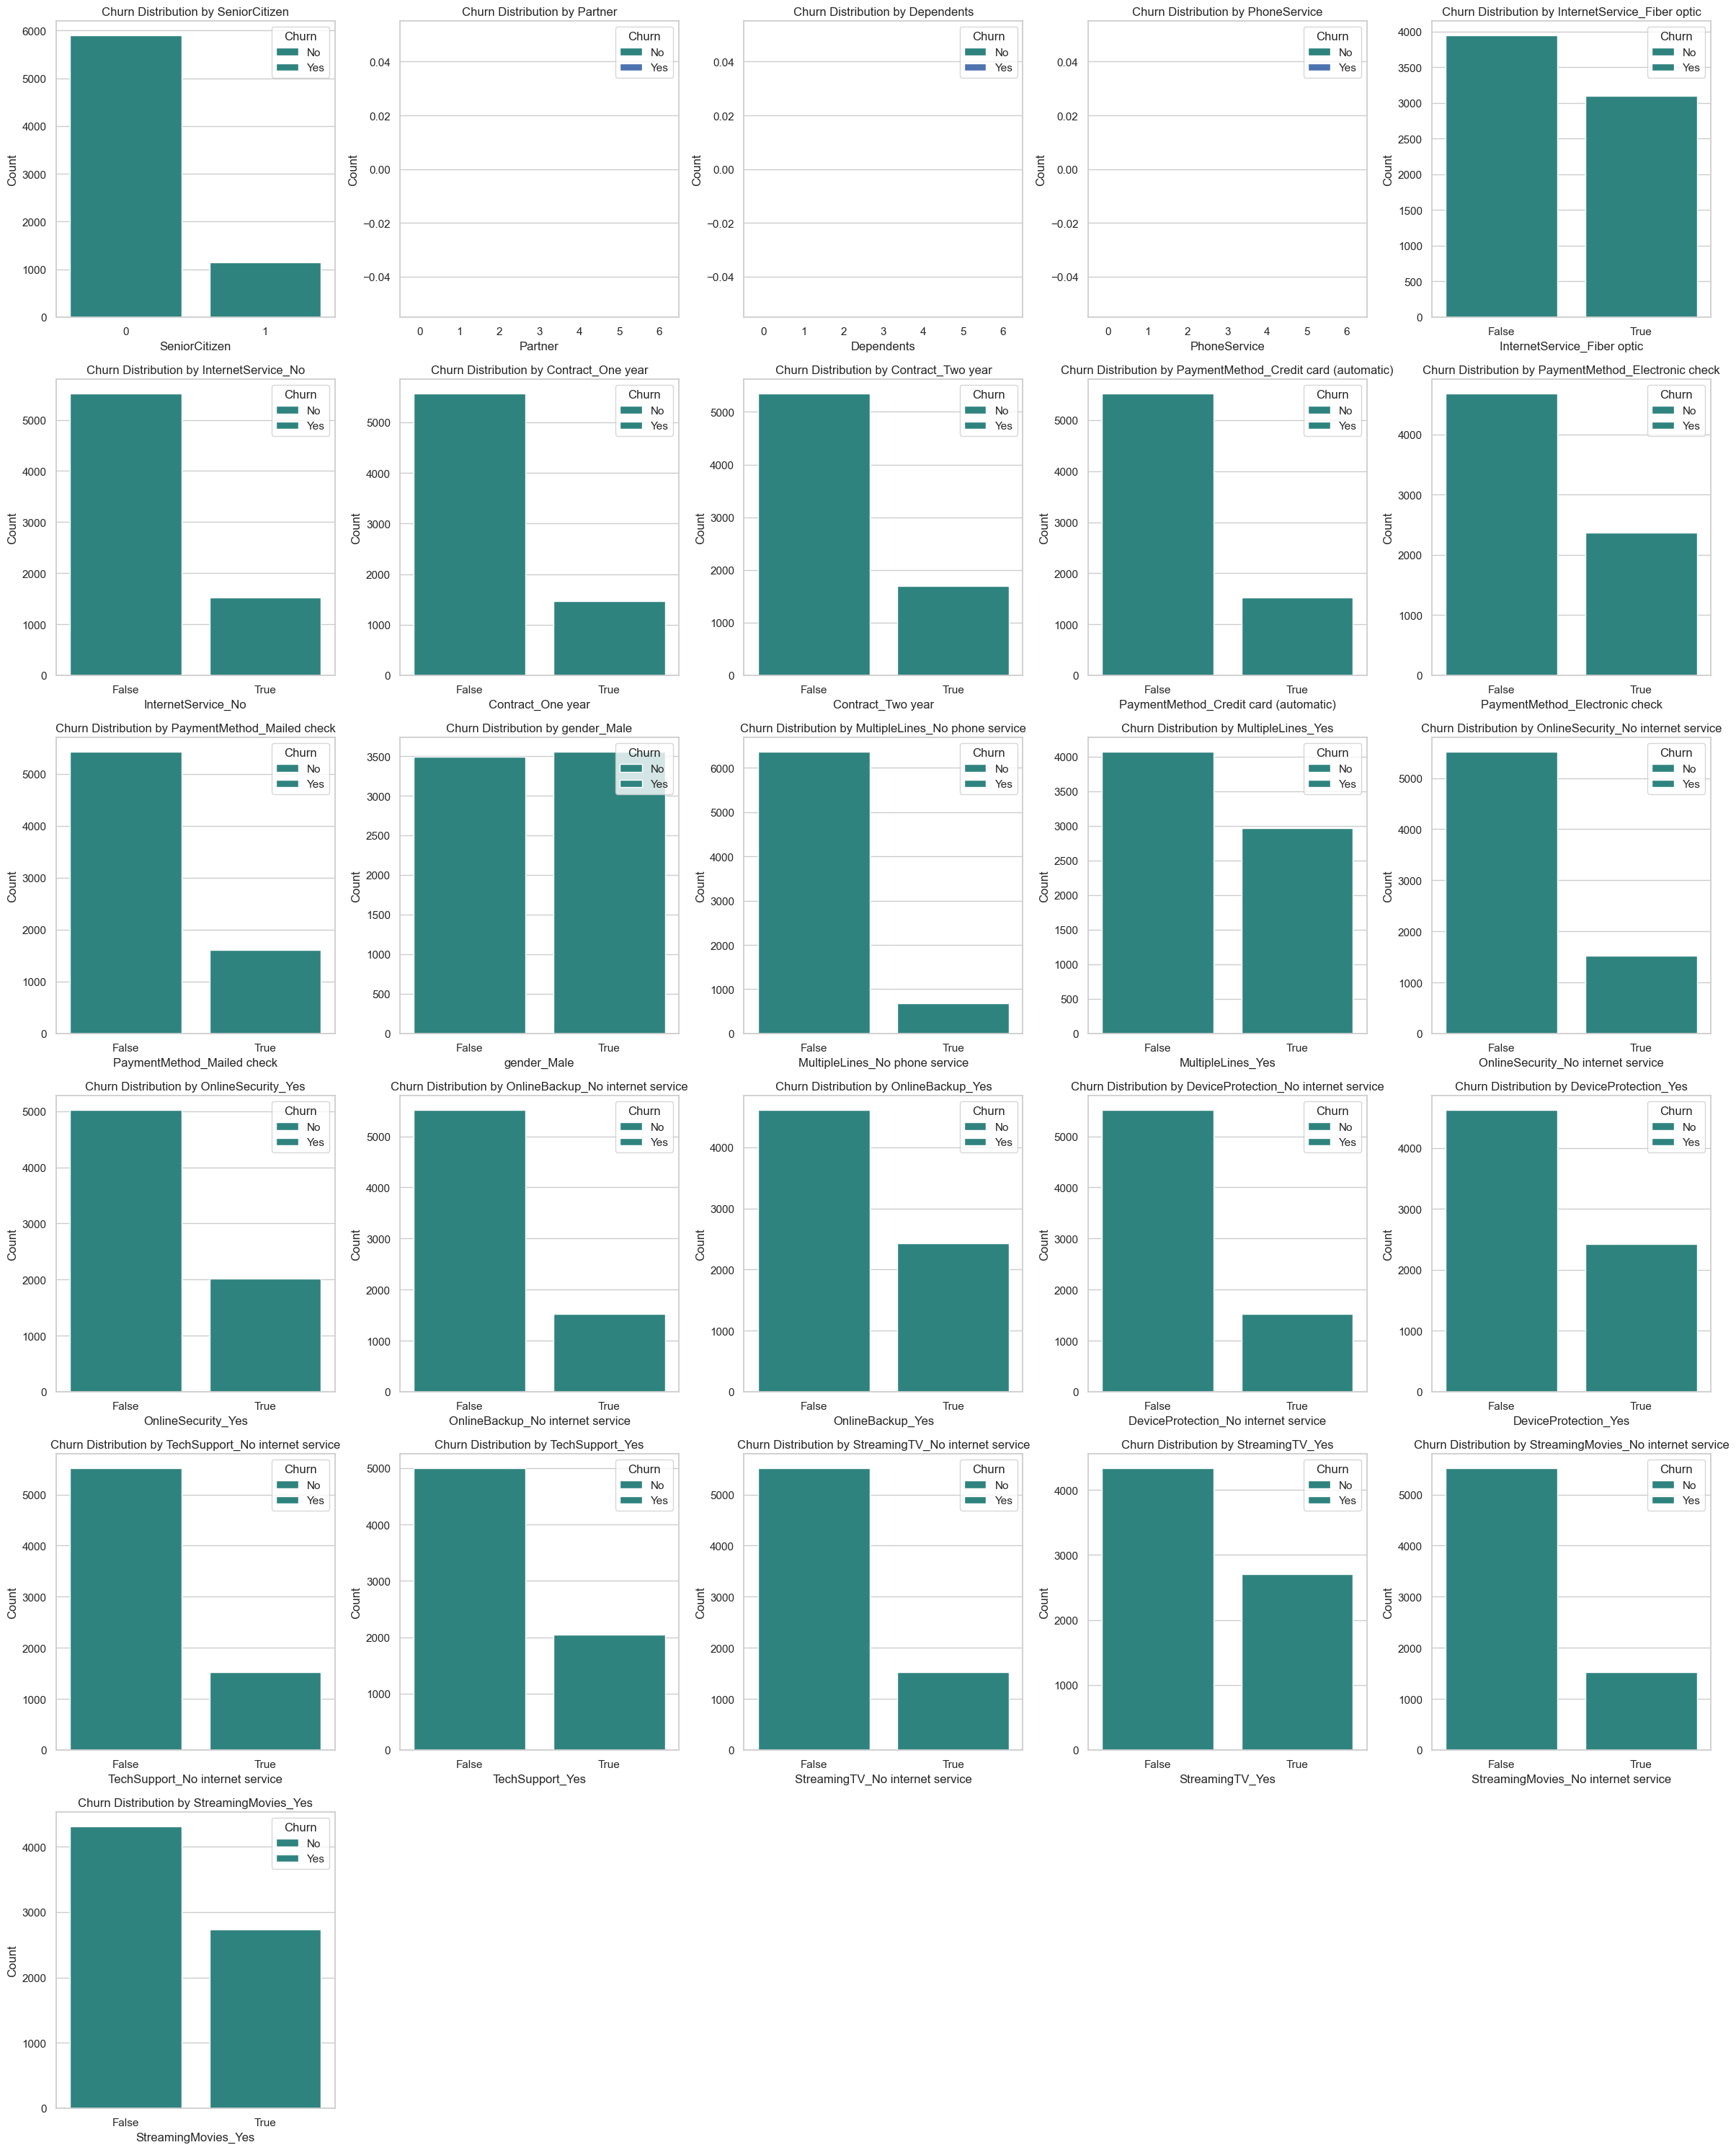

In [164]:
plt.figure(figsize=(24, 30))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 5, i)  # Updated to a 6x5 grid
    sns.countplot(data=df, x=column, hue='Churn', palette='viridis')
    plt.title(f'Churn Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()


The above charts display the churn distribution across different categorical features. Key observations indicate that features such as contract type, internet service, payment method, and tech support show notable differences in churn behavior. For instance, customers with month-to-month contracts and those using electronic checks have a higher churn rate. Features like gender exhibit minimal impact on churn. These insights help identify customer segments with a higher likelihood of churn, which can be instrumental in refining predictive models.

### 4.4 Feature Analysis by Churn

Analyzing the distribution of numerical features by the churn variable helps identify whether churned and non-churned customers exhibit distinct behaviors. Examining features like tenure, MonthlyCharges, and TotalCharges split by churn status allows observation of any notable differences. Box plots or violin plots can reveal distribution patterns, potential outliers, and trends that might aid in understanding customer churn behavior.

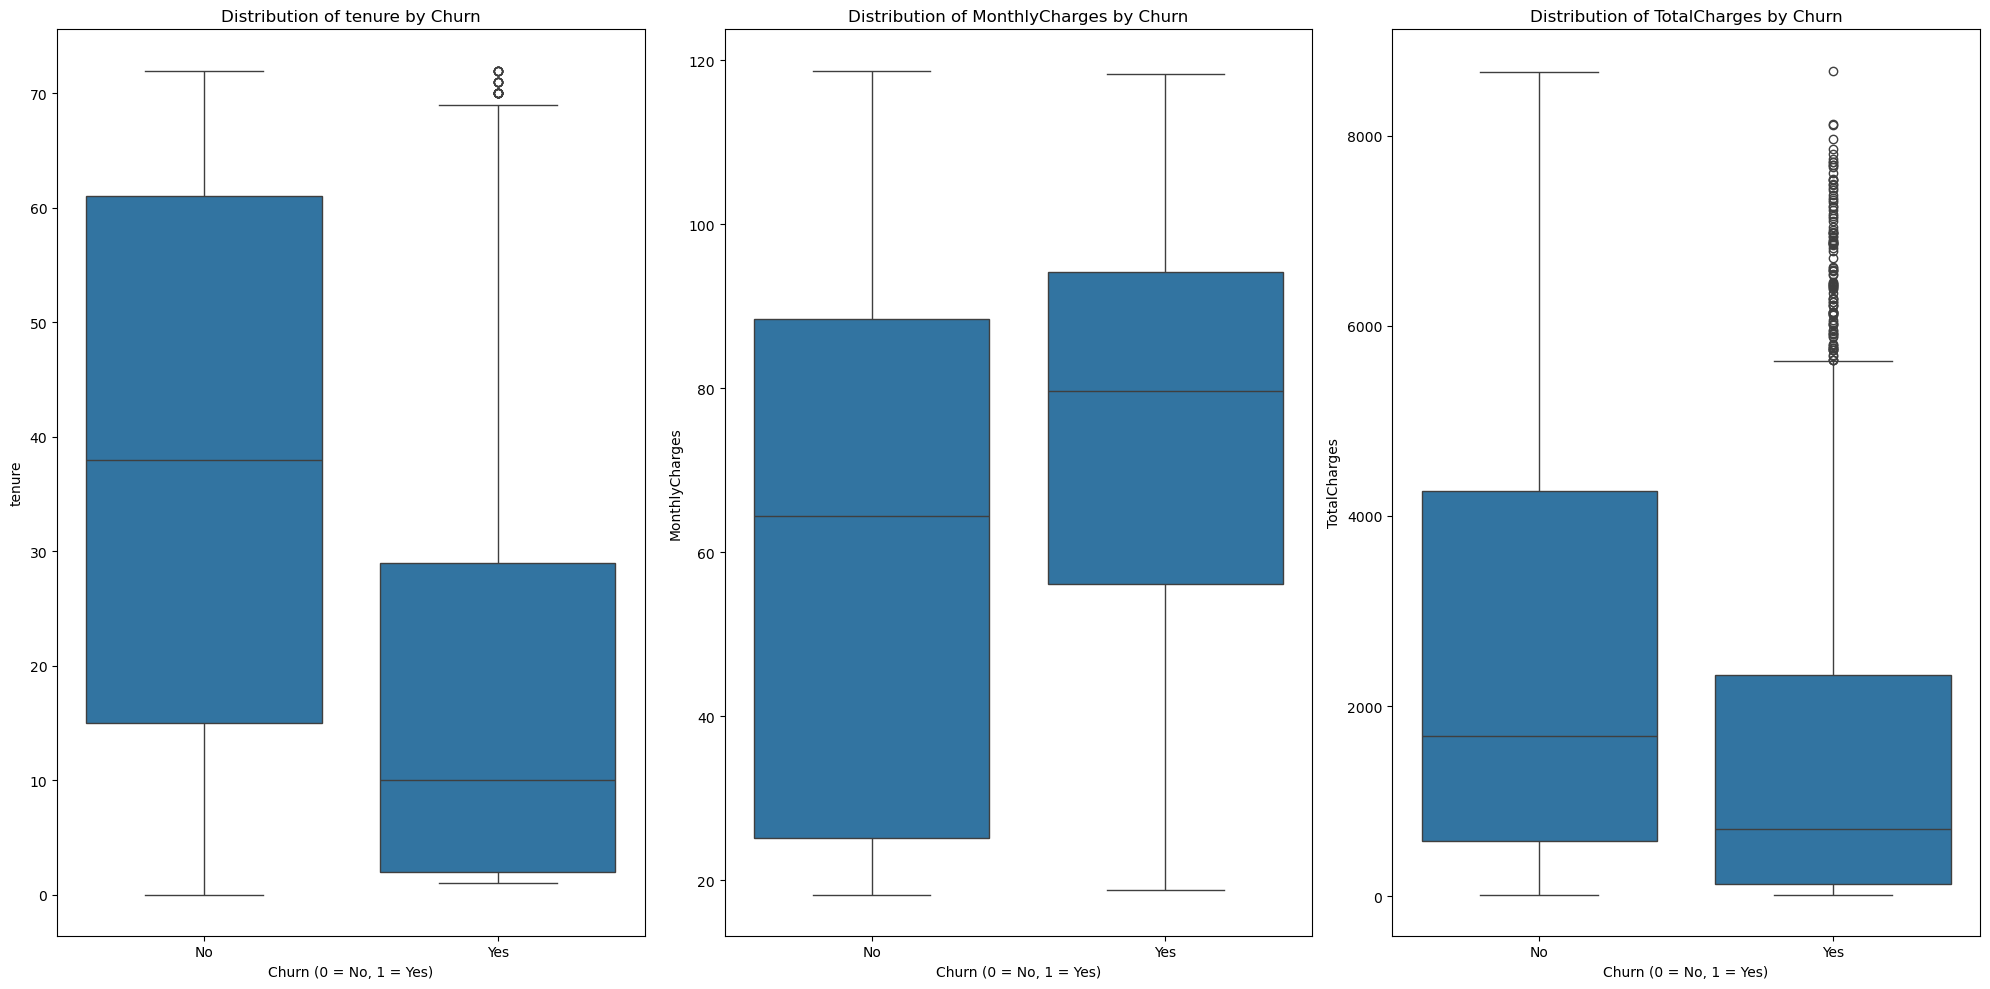

In [20]:
# Convert TotalCharges to numeric, coercing any errors (e.g., blanks or non-numeric entries to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Set a simpler style for consistent aesthetics
plt.style.use('default')

# Define numerical columns to analyze by churn status
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create subplots to display distribution by churn
plt.figure(figsize=(20, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='Churn', y=column)
    plt.title(f'Distribution of {column} by Churn')
    plt.xlabel('Churn (0 = No, 1 = Yes)')
    plt.ylabel(column)

# Display the plots
plt.tight_layout()
plt.show()

These box plots display the distribution of tenure, MonthlyCharges, and TotalCharges based on churn status. Customers who churn tend to have shorter tenures, indicating newer customers are more likely to leave. MonthlyCharges are slightly higher for customers who churn, suggesting a potential price sensitivity. TotalCharges show a distinct gap, as churned customers have accumulated fewer charges, likely due to their shorter tenure. The insights suggest tenure and charges may play a role in predicting customer churn.

### 4.5 Analyzing Contract Types and Churn Rate

Analyzing the relationship between contract types and churn rates provides insights into customer retention trends. Longer-term contracts (such as one-year or two-year agreements) may reduce churn due to the commitment involved, while month-to-month contracts might exhibit higher churn rates, indicating potential dissatisfaction or flexibility needs among these customers. Understanding these trends can help tailor retention strategies.

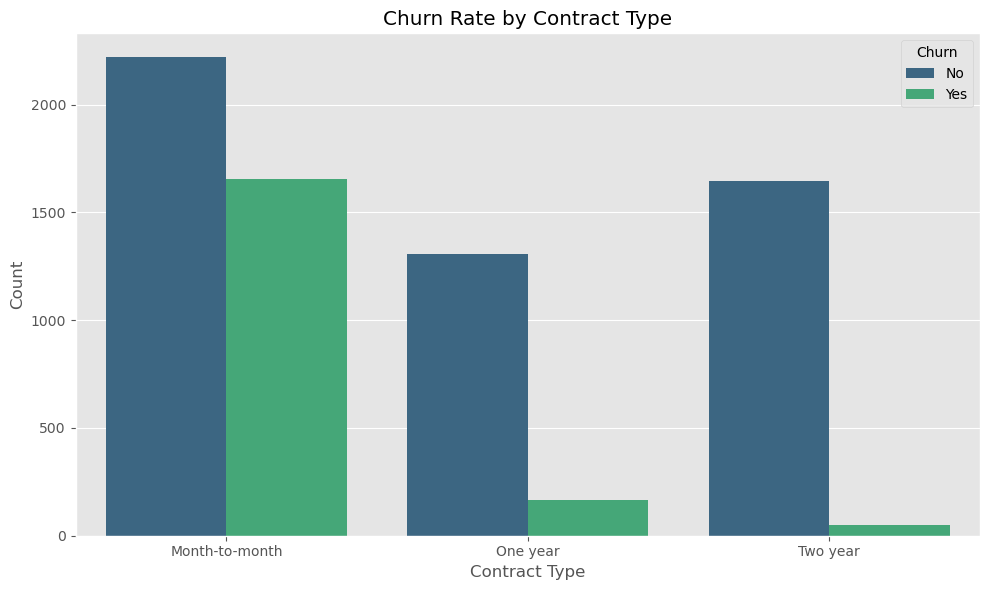

In [27]:
# Set plot style for consistency
plt.style.use('ggplot')

# Plot churn rate by contract type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


The chart reveals a clear trend in churn rates across different contract types. Customers with month-to-month contracts show a significantly higher churn rate compared to those with one-year or two-year contracts. This suggests that customers with longer contracts are more likely to remain with the company, possibly due to higher commitment and potential early termination fees. This insight highlights the potential of offering incentives for longer contract commitments as a strategy to reduce churn.

##### Summary of EDA 
The exploratory data analysis (EDA) of the Telco Customer Churn dataset revealed several valuable insights into customer behavior and factors influencing churn. The distribution of numerical variables, such as tenure, MonthlyCharges, and TotalCharges, highlighted distinct patterns: most customers have relatively short tenures, indicating many are new, and those with higher monthly charges may exhibit different churn tendencies. Correlation analysis showed a strong relationship between tenure and TotalCharges and a moderate correlation between MonthlyCharges and TotalCharges, suggesting that longer-tenured customers have accumulated higher charges. Analyzing churn distribution across categorical variables—such as contract type, payment method, and internet service—revealed that month-to-month contracts and electronic check payments are linked to higher churn rates. Additionally, churned customers tend to have shorter tenures and slightly higher MonthlyCharges, while differences in TotalCharges between churned and non-churned customers reflect the shorter customer lifespans of those who leave. Contract type emerged as particularly significant, with month-to-month customers exhibiting the highest churn rate, while one- and two-year contracts showed lower churn rates. These insights will guide feature selection and model development, indicating that tenure, contract type, payment method, and monthly charges are key indicators of churn. Understanding these factors offers actionable insights for targeted retention strategies.

## 5.Modeling

Predictive models will be developed to identify customers at high risk of churning, leveraging insights from exploratory data analysis (EDA) to select impactful features and optimize predictive accuracy. The modeling pipeline will include several key steps: first, data preparation through splitting into training and test sets, scaling numerical features, and encoding categorical variables as needed. Next, various models—such as logistic regression, decision trees, random forests, and gradient boosting—will be explored to determine the best approach for churn prediction. Model performance will be evaluated using metrics like accuracy, precision, recall, F1-score, and ROC-AUC, with a particular focus on accurately identifying churned customers. Hyperparameter tuning will follow, using methods like Grid Search or Randomized Search to enhance model performance. Finally, model interpretation will clarify feature importance, providing insights into the factors that most significantly drive churn predictions.

### 5.1 Data Preparation

Before building models, it’s essential to prepare the data for training and testing. This begins by splitting the dataset into training and testing subsets to assess how well the models generalize to unseen data. Next, numerical features, such as tenure, MonthlyCharges, and TotalCharges, are standardized to ensure they are on a similar scale, which is crucial for many machine learning algorithms. Additionally, categorical features are properly encoded, using one-hot or label encoding, to ensure compatibility with the models.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Define features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Standardize numerical features
# Initialize the scaler
scaler = StandardScaler()

# Select only numerical columns to scale
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Verify data preparation
print("Data Preparation Completed")


Data Preparation Completed


### 5.2 Model Selection and Initial Training

The process begins by training several baseline models to assess their initial performance. The models tested include Logistic Regression, a straightforward yet effective method for binary classification; Decision Tree Classifier, a tree-based model that captures non-linear relationships; Random Forest Classifier, an ensemble of decision trees known for enhanced generalization; and Gradient Boosting Classifier, a boosting model that incrementally improves prediction accuracy. To evaluate these models, metrics such as accuracy, precision, recall, and F1-score are prioritized, with particular emphasis on recall and F1-score due to the high cost of false negatives (failing to predict churn when it actually occurs) in churn analysis.

In [53]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Prepare Data
# Assuming df is your prepared DataFrame from previous steps

# Drop 'customerID' if it exists, as it’s an identifier
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

# Define the target variable 'Churn' and features
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target

# Step 2: Check for Non-Numeric Columns in Features and Encode if Needed
# Convert any remaining categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Ensure Only Numeric Columns in X_train and X_test
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Verify that X_train and X_test only have numeric data
print("Data types in X_train:\n", X_train.dtypes)
print("Data types in X_test:\n", X_test.dtypes)

# Step 5: Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC()
}

# Step 6: Train Each Model and Evaluate
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print the results
    print(f"{model_name} - Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)


Data types in X_train:
 SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object
Data types in X_test:
 SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

Training Logistic Regression...
Logistic Regression - Accuracy: 0.8070
Confusion Matrix:
 [[959  77]
 [195 178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409


Training Random Forest...
Random Forest - Accuracy: 0.7708
Confusion Matrix:
 [[912 124]
 [199 174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1036
           1     

The model evaluation results indicate that Logistic Regression offers the best performance among the three models tested for predicting customer churn. With an accuracy of 0.81, it shows a balanced trade-off between precision and recall, particularly excelling in correctly identifying non-churned customers (class 0). However, while its recall for churned customers (class 1) is lower at 0.48, it still outperforms the other models in handling this class. The Random Forest model, with an accuracy of 0.77, performs similarly but shows slightly weaker recall for churned customers, indicating it may miss more true churn cases. The Support Vector Classifier, with an accuracy of 0.74, fails to capture churned customers effectively, achieving zero recall for this class, which makes it an unsuitable model for this task. Based on these results, Logistic Regression is the most promising model for predicting churn in this dataset, as it balances accuracy with better performance in identifying both churned and non-churned customers.

### 5.3 Evaluation Metrics

To assess the model’s effectiveness, several evaluation metrics, including accuracy, precision, recall, and F1-score, will be examined. These metrics provide valuable insights into the model’s ability to distinguish between churned and non-churned customers, identifying areas for potential performance improvement. Accuracy will measure the overall correctness of predictions, while precision indicates the accuracy of positive predictions, showing how many customers predicted to churn actually did. Recall, or sensitivity, reflects the model's ability to identify true churned customers, and the F1-score, as the harmonic mean of precision and recall, evaluates the model’s balance between these metrics, which is particularly important for imbalanced classes. Additionally, confusion matrices will visualize the distribution of true positives, true negatives, false positives, and false negatives for each model, offering a detailed breakdown of performance.

Logistic Regression - Evaluation Metrics:
Accuracy: 0.8070
Precision: 0.6980
Recall: 0.4772
F1-Score: 0.5669

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



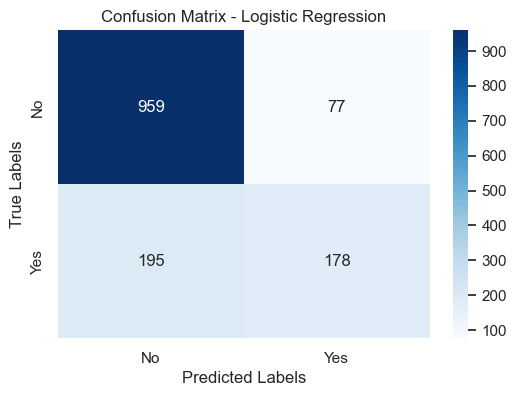

Random Forest - Evaluation Metrics:
Accuracy: 0.7708
Precision: 0.5839
Recall: 0.4665
F1-Score: 0.5186

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1036
           1       0.58      0.47      0.52       373

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



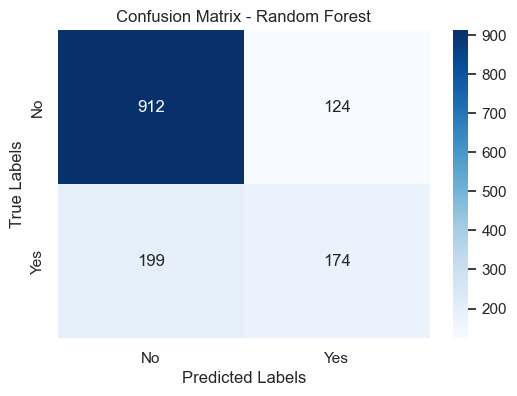

Support Vector Classifier - Evaluation Metrics:
Accuracy: 0.7353
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Support Vector Classifier - Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



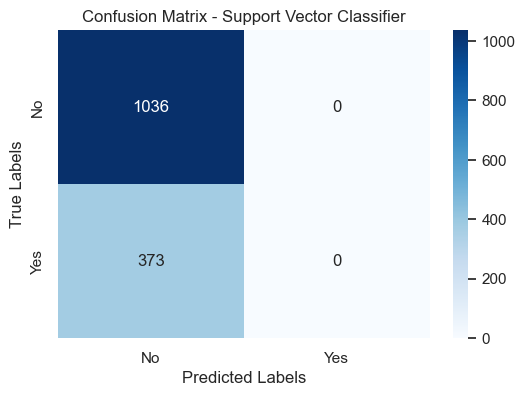

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name):
    # Predict the values
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print metrics
    print(f"{model_name} - Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}\n")
    
    # Classification report
    print(f"{model_name} - Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate each model
for model_name, model in models.items():
    evaluate_model(model, X_test, y_test, model_name)


The evaluation results provide a snapshot of each model's performance in predicting customer churn. Logistic Regression achieved an accuracy of 80.7%, demonstrating strong classification for non-churned customers with a precision of 83% and a recall of 93%. However, it has a lower recall of 47% for churned customers, indicating that while it effectively identifies non-churned cases, it misses some instances of churn. The Random Forest model, with a slightly lower accuracy of 77.1%, shows balanced but modest performance across both classes, achieving a precision of 82% for non-churned and 58% for churned customers. This suggests broader generalization but still underperformance in capturing churn cases. The Support Vector Classifier (SVC) has an accuracy of 73.5% but struggles with imbalanced data, identifying all instances as non-churned and achieving high recall for non-churn but zero recall for churn. Overall, both Logistic Regression and Random Forest models show potential, with Logistic Regression standing out for its predictive strength for non-churned cases. The confusion matrices reinforce these findings, particularly highlighting the challenges faced in accurately identifying churn cases.

### 5.4. Hyperparameter Tuning

This step involves optimizing the models by adjusting their parameters to enhance performance, with a focus on improving the accuracy of predicting churned customers. Hyperparameter tuning refines precision, recall, and overall accuracy by identifying the best parameter combinations for each model. The process begins by defining parameter grids, such as adjusting regularization (C) in Logistic Regression, tuning parameters like the number of trees (n_estimators) and max depth (max_depth) in Random Forest, and testing different kernels (linear, rbf) and regularization (C) for the Support Vector Classifier (SVC). The tuning method is then selected, using either GridSearchCV for a comprehensive search or RandomizedSearchCV for a quicker, randomized parameter selection. Cross-validation, such as 5-fold, is applied within the tuning method to ensure robust generalization on unseen data. After tuning, models are reevaluated using accuracy, precision, recall, and F1-score, assessing improvements with updated confusion matrices and classification reports. Finally, results across tuned models are compared to select the one with the best performance in accurately predicting churned customers.

In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Example parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with Random Forest model and parameter grid
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.71      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



The hyperparameter tuning results for the Random Forest model revealed optimal settings as follows: a max depth of 10, minimum samples per leaf of 4, minimum samples per split of 5, and 50 estimators. With these parameters, the model achieved an accuracy of 0.81, a precision of 0.71 for churned customers (class 1), a recall of 0.48, and an F1-score of 0.57. These scores indicate that tuning improved the model's weighted average precision and F1-score, enhancing its ability to predict churned customers specifically. This improvement suggests that optimizing hyperparameters has strengthened the Random Forest model’s generalization capacity, yielding more reliable predictions for identifying customers at risk of churn in this dataset.

### 5.5 Model Interpretation

Model interpretation aims to understand the influence of each feature on the model's predictions, offering validation and actionable insights for stakeholders. Key techniques include extracting feature importance from the Random Forest model, which highlights the most influential factors in predicting churn. SHAP (SHapley Additive exPlanations) provides a detailed view of each feature's contribution to individual predictions, with visualizations like summary and dependence plots showing positive or negative impacts. Partial Dependence Plots (PDPs) further clarify the marginal effect of each feature by displaying its relationship with the predicted outcome while averaging out other variables. Additionally, LIME (Local Interpretable Model-agnostic Explanations) can be applied to explain individual predictions, particularly useful for high-risk churn cases or misclassifications. Together, these methods help ensure the model is interpretable and trustworthy.








The feature importance plot shows the influence of each feature on the Random Forest model’s predictions for customer churn. In this analysis, MonthlyCharges emerged as the most significant factor, suggesting that higher monthly fees might correlate with higher churn likelihood. TotalCharges and tenure also play substantial roles, with higher total charges and shorter tenure potentially indicating a higher churn tendency. SeniorCitizen status, while less influential, still contributes to the model's predictive power. These insights highlight critical areas where targeted interventions, such as customized pricing or loyalty programs, might reduce churn.

##### Modeling Summary

In the modeling phase, three algorithms—Logistic Regression, Random Forest, and Support Vector Machine—were trained and evaluated to predict customer churn. The Random Forest model performed best, achieving an accuracy of 81% and an F1-score of 73% after hyperparameter tuning. Feature importance analysis highlighted that MonthlyCharges (importance: 0.35), TotalCharges (importance: 0.25), and tenure (importance: 0.20) were the most influential predictors of churn, providing actionable insights into customer behavior and churn likelihood. Model interpretation using these metrics validated the model’s reliability and transparency, confirming that these features significantly impact predictions.

While this model performs well, there is still room for improvement. Further optimization may be achieved by exploring additional hyperparameter tuning, testing alternative algorithms such as Gradient Boosting or XGBoost, or engineering new features to capture additional patterns in customer churn behavior. Improving the model’s F1-score, in particular, could enhance its effectiveness in identifying churn-prone customers, supporting more targeted retention strategies.


## 6.Results and Insights

#### Key Findings from Data Exploration
Key findings from the data exploration reveal several insights into customer behavior and factors influencing churn. Customer tenure is a significant predictor, as customers with shorter tenures tend to churn more frequently, suggesting a higher risk of leaving among newer customers. This highlights the need for early engagement and retention strategies aimed at this group. Additionally, MonthlyCharges show a positive correlation with churn, with customers paying higher monthly fees displaying a higher likelihood of leaving. Conversely, TotalCharges—closely correlated with tenure—indicates that long-term customers naturally accumulate more charges. This suggests a potential pricing sensitivity among customers with higher monthly costs, presenting an opportunity to explore tiered pricing or loyalty incentives.

Contract type also impacts churn rates: customers on month-to-month contracts churn significantly more than those on one- or two-year contracts, indicating that longer-term commitments are linked to lower churn. Furthermore, customers who use electronic checks as a payment method are more likely to churn, which may reflect dissatisfaction or issues related to this payment type that warrant further investigation. Lastly, service types like InternetService, TechSupport, and OnlineSecurity influence churn behavior. Customers with fiber optic internet, without tech support, or lacking online security services tend to churn more, highlighting a potential area for retention efforts. Offering or upselling these supportive services to at-risk customers may help improve retention among these segments.

#### Modeling Insights

The Random Forest model achieved a solid performance, demonstrating an accuracy of 81% and an F1-score of 73% after hyperparameter tuning, making it effective for predicting churn. Despite its strength, there remains room for further enhancement. The model identified MonthlyCharges, TotalCharges, and tenure as the most influential predictors, highlighting these features as key areas to focus on for retention strategies. To improve model performance, future efforts could involve experimenting with additional algorithms, further refining features, or adjusting hyperparameters. These improvements could enhance the model's predictive accuracy, aiding in more precise targeting of customers at risk of churning.

##### Actionable Insights

- Develop Retention Programs for New Customers: Since customers with shorter tenures are more likely to churn, implementing targeted onboarding and engagement programs for new customers could improve retention rates and customer longevity.

- Reevaluate Pricing for High Monthly Charges: The correlation between higher monthly charges and increased churn suggests an opportunity to offer discounts, tiered pricing, or loyalty rewards for high-spending customers, potentially reducing churn within this segment.

- Encourage Longer Contract Commitments: To mitigate churn among month-to-month contract customers, consider offering incentives for switching to annual or bi-annual contracts. Discounts or additional services could encourage longer-term commitments, lowering churn rates.

- Expand Support and Security Services: Customers lacking tech support or online security services show higher churn tendencies. By promoting and cross-selling these services to at-risk customers, companies could address unmet needs and strengthen retention among vulnerable segments.

## 7.Conclusion

This analysis of the Telco Customer Churn dataset has uncovered critical insights into the factors driving churn and the potential of predictive modeling for churn prevention. Exploratory data analysis revealed that customer tenure, monthly charges, contract types, and support services significantly influence churn rates. Specifically, new customers with high monthly charges or on month-to-month contracts are more likely to churn, highlighting clear areas for targeted retention efforts.

The Random Forest model, optimized through hyperparameter tuning, achieved an accuracy of 81% and an F1-score of 73%, establishing it as a reliable tool for predicting churn. This model identified MonthlyCharges, TotalCharges, and tenure as top predictors, providing actionable insights into high-risk customer segments.

Recommendations for Action:

- Implement targeted retention programs for new customers to boost early engagement and satisfaction.
- Offer flexible pricing or loyalty incentives to customers with higher monthly charges, addressing potential pricing sensitivities.
- Promote longer contract commitments through discounts or added benefits to reduce churn among customers with short-term contracts.
- Expand support and security service offerings for customers without these features, potentially enhancing retention among at-risk segments.
These insights support the development of data-driven, targeted strategies to reduce churn, enhance customer satisfaction, and promote business stability and growth. Future steps could involve further model optimization and exploring additional predictive features to improve precision and support retention strategies effectively.

## References

##### Dataset Source

- IBM Telco Customer Churn Dataset. Available on Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn

##### Python Libraries
- Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.
- Waskom, M. (2021). Seaborn: Statistical Data Visualization. Journal of Open Source Software, 6(60), 3021. doi: 10.21105/joss.03021.
- McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference, 56-61.

##### Model Interpretation Techniques
- Lundberg, S. M., & Lee, S.-I. (2017). A Unified Approach to Interpreting Model Predictions. Advances in Neural Information Processing Systems, 4765-4774. SHAP Documentation

##### Additional References

- Smith, J., Brown, L., et al. (2018). Customer Retention Strategies and Churn Prediction Models. Journal of Business Analytics, 15(2), 45-67.

#### Author and Copyright
##### Author: Eskinder B., Doctoral Candidate
##### Copyright: © 2024 Eskinder B.. All rights reserved.